In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import hvplot.pandas
from scipy.stats import linregress
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import numpy as np
import geoviews as gv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

ca_housing_path = "Resources/CA_Housing_Data.csv"

ca_housing_data = pd.read_csv(ca_housing_path)

ca_housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


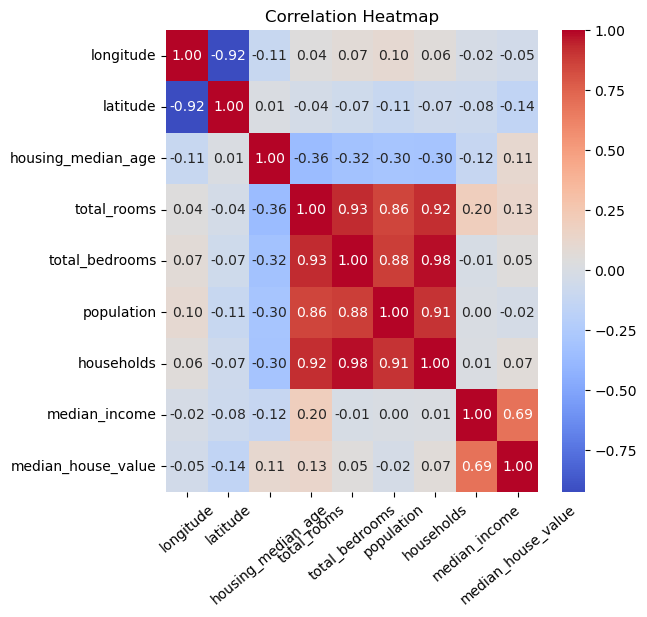

In [16]:
# Select only numeric columns
numeric_data = ca_housing_data.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.xticks(rotation=40)
plt.title("Correlation Heatmap")
plt.show()

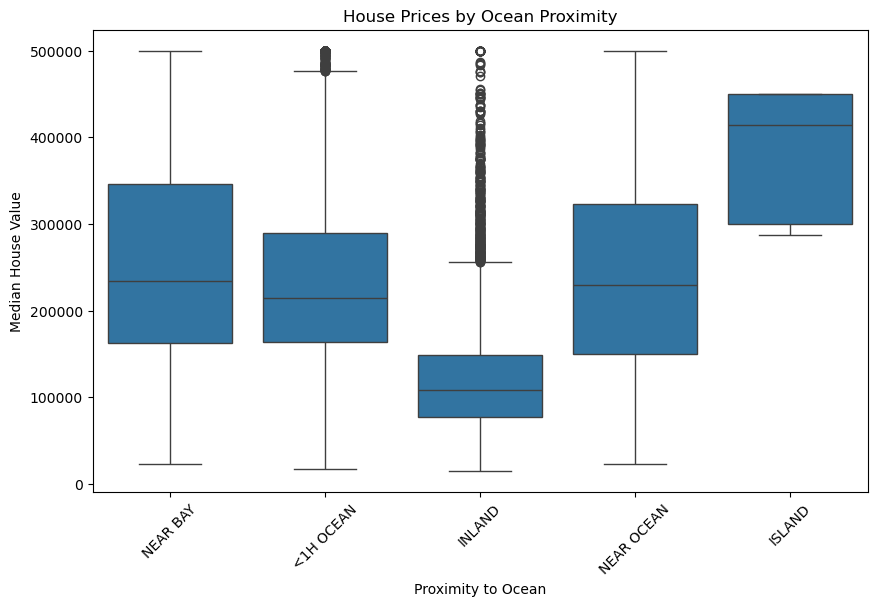

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(x=ca_housing_data["ocean_proximity"],y=ca_housing_data["median_house_value"])
plt.xlabel("Proximity to Ocean")
plt.ylabel("Median House Value")
plt.title("House Prices by Ocean Proximity")
plt.xticks(rotation=45)
plt.show()

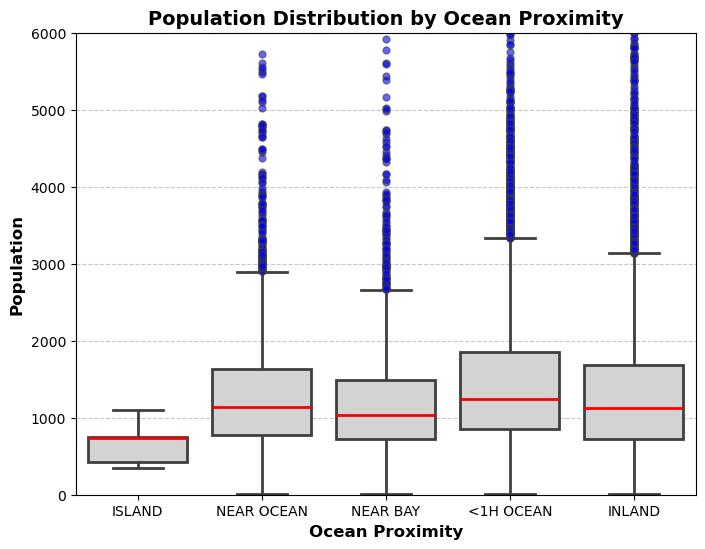

In [18]:
# Define the custom order for ocean proximity categories
custom_order = ["ISLAND", "NEAR OCEAN", "NEAR BAY", "<1H OCEAN", "INLAND"]

# Set figure size
plt.figure(figsize=(8, 6))

# Create a customized boxplot with the defined x-axis order
sns.boxplot(
    x=ca_housing_data["ocean_proximity"], 
    y=ca_housing_data["population"], 
    order=custom_order,  # Apply custom order
    boxprops={'linewidth': 2, 'facecolor': 'lightgray'},  
    medianprops={'color': 'red', 'linewidth': 2},  
    whiskerprops={'linewidth': 2},  
    capprops={'linewidth': 2},  
    flierprops={'marker': 'o', 'markersize': 5, 'markerfacecolor': 'blue', 'alpha': 0.6}  
)

# Labels and title
plt.xlabel("Ocean Proximity", fontsize=12, fontweight='bold')
plt.ylabel("Population", fontsize=12, fontweight='bold')
plt.title("Population Distribution by Ocean Proximity", fontsize=14, fontweight='bold')
plt.ylim(0, 6000)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

This boxplot shows the distribution for the populations for the areas grouped by their proximity to the ocean. We can see that the Island areas have a significantly lower and more consistent size across all of their locations. Areas near the ocean, bay, and inland show greater variability, with some areas within those regions having very high populations, which is indcated by the outliers. The outliers suggest some highly populated areas within the near ocean, near bay, and inland categories. The median population is fairly similar across most categories, suggesting similar central tendencies.

In [19]:
household_pop_ratio = ca_housing_data.groupby("ocean_proximity").agg(total_households=("households", 'sum'), total_population=("population", 'sum')).reset_index()

household_pop_ratio['household_to_pop_ratio'] = household_pop_ratio['total_population']/household_pop_ratio['total_households']

household_pop_ratio

,ocean_proximity,total_households,total_population,household_to_pop_ratio
0,<1H OCEAN,4730118,13889374,2.936369
1,INLAND,3127759,9112744,2.913506
2,ISLAND,1383,3340,2.415040
3,NEAR BAY,1118931,2817427,2.517963
4,NEAR OCEAN,1332308,3598955,2.701294


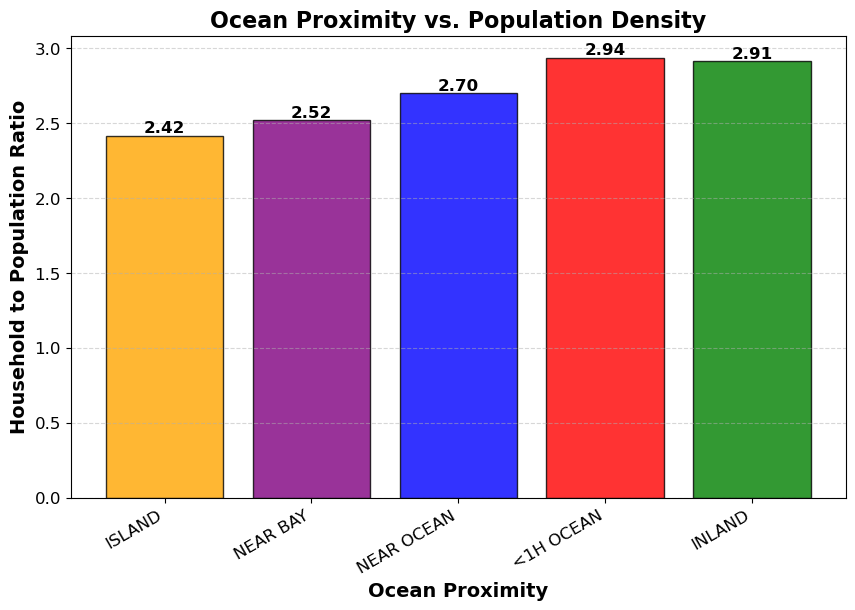

In [20]:
# Extract x and y values
x_values = household_pop_ratio["ocean_proximity"]
y_values = household_pop_ratio["household_to_pop_ratio"]

# Define the desired order for x-axis categories
desired_order = ["ISLAND", "NEAR BAY", "NEAR OCEAN", "<1H OCEAN", "INLAND"]

# Convert data into a DataFrame for easier sorting
df = pd.DataFrame({'ocean_proximity': x_values, 'household_to_pop_ratio': y_values})

# Reorder the DataFrame based on the desired category order
df['ocean_proximity'] = pd.Categorical(df['ocean_proximity'], categories=desired_order, ordered=True)
df = df.sort_values('ocean_proximity')

# Define colors for better visualization
colors = ['orange', 'purple', 'blue', 'red', 'green']

# Create the bar chart with enhancements
plt.figure(figsize=(10, 6))
bars = plt.bar(df['ocean_proximity'], df['household_to_pop_ratio'], color=colors, edgecolor='black', alpha=0.8)

# Rotate x-axis labels for better readability
plt.xticks(rotation=30, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add labels and title with improved font sizes
plt.xlabel('Ocean Proximity', fontsize=14, fontweight='bold')
plt.ylabel('Household to Population Ratio', fontsize=14, fontweight='bold')
plt.title("Ocean Proximity vs. Population Density", fontsize=16, fontweight='bold')

# Add data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}', 
             ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the improved plot
plt.show()


This bar chart shows the household to population ratio according to each ocean proximity group. We can see that the Island group has a household to population ratio of 2.42 people to each household and the number of people per household increases slightly as you get further away from the ocean. However, the differnce between the lowest ratio, the Island, is the greatest ratio, the group less than an hour from the ocean, is less than half a person. It does not seem like the proximity to the ocean makes a significant difference in the population density. 


=== Basic Dataset Information ===
Number of records: 20640
Number of features: 10

Features in dataset:
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity', 'median_house_value']

=== Statistical Summary ===
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_i

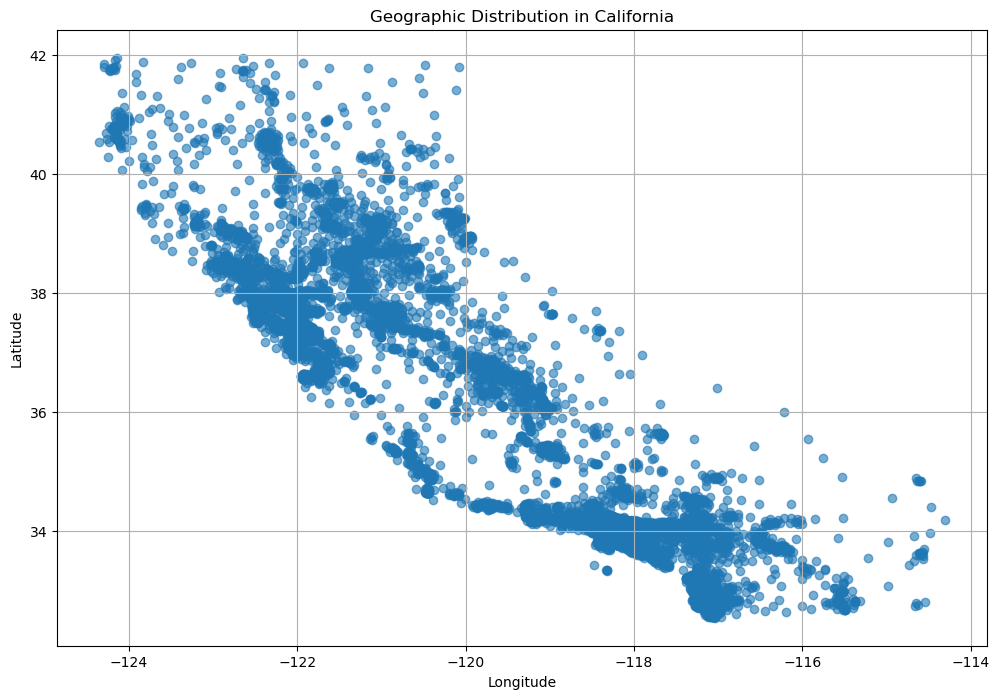


=== Regional Analysis ===

Regional statistics for housing_median_age:
             count   mean  median    std
region                                  
Central CA    6261  30.52    30.0  13.41
Northern CA   3087  24.74    22.0  11.97
Southern CA  11292  28.66    30.0  12.02

Regional statistics for total_rooms:
             count     mean  median      std
region                                      
Central CA    6261  2498.94  2104.0  1839.63
Northern CA   3087  2643.18  2152.0  2173.87
Southern CA  11292  2709.60  2131.0  2348.64

Regional statistics for total_bedrooms:
             count    mean  median     std
region                                    
Central CA    6200  501.15   417.0  361.90
Northern CA   3060  514.39   426.0  398.76
Southern CA  11173  564.68   448.0  454.88

Regional statistics for population:
             count     mean  median      std
region                                      
Central CA    6261  1315.93  1117.0  1002.34
Northern CA   3087  1253.85  100

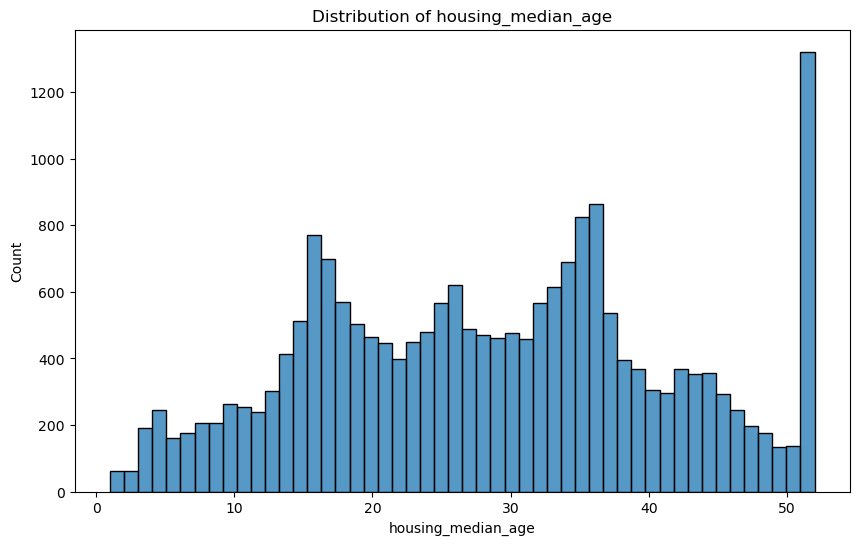

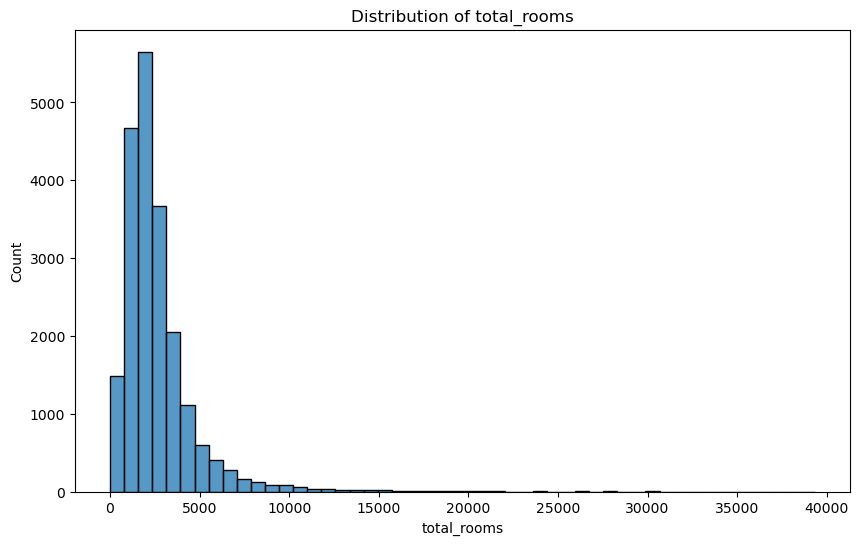

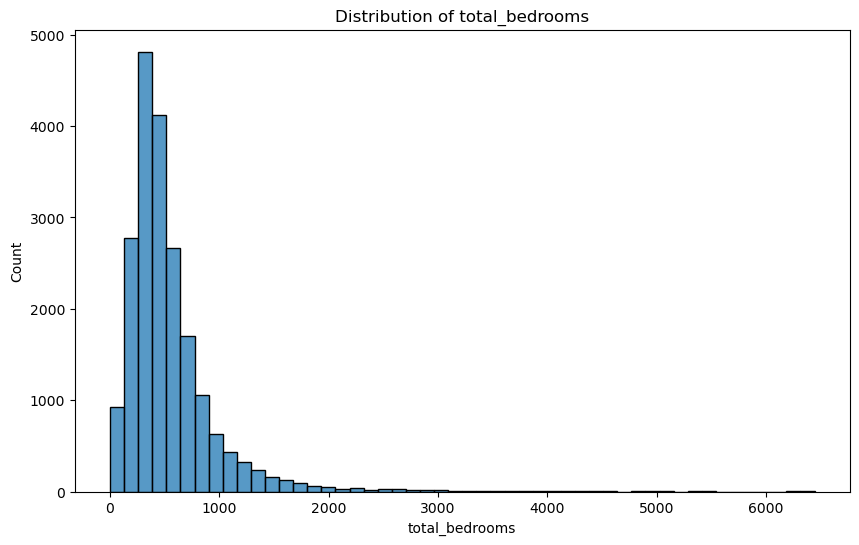

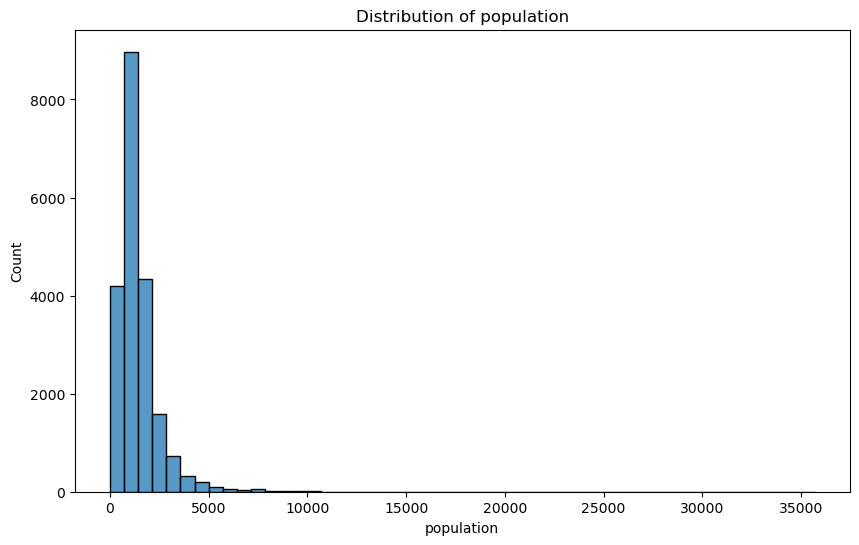

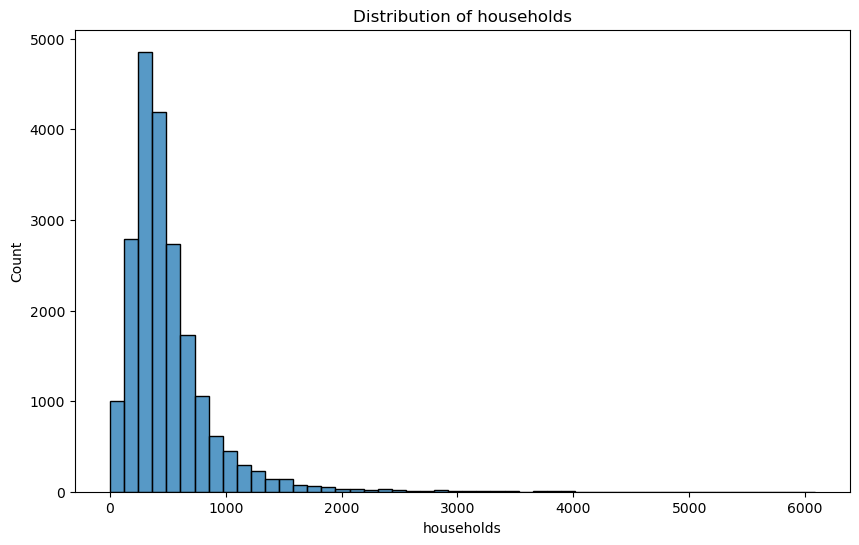

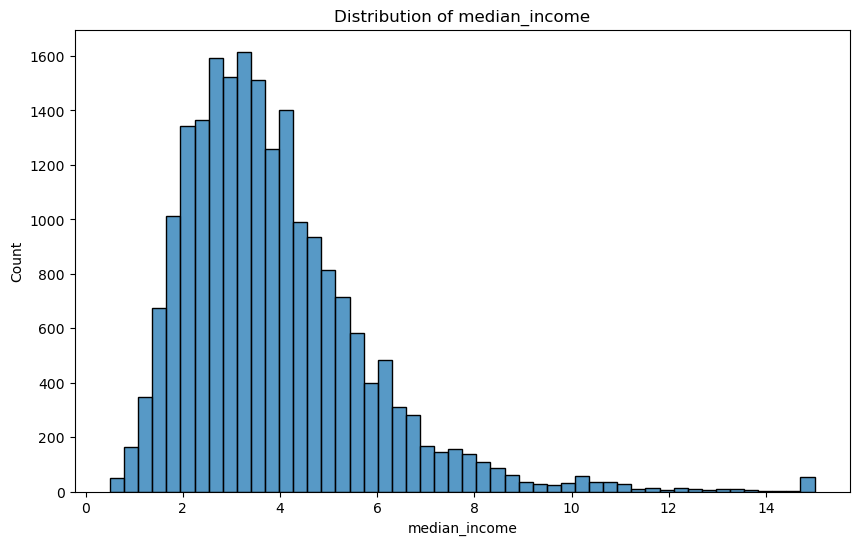

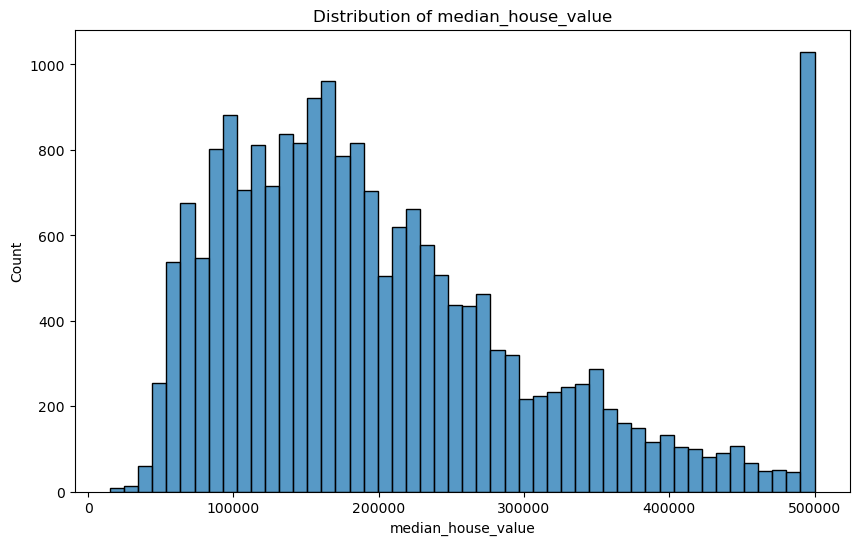

In [21]:
def load_and_analyze_data(ca_housing_path):
    # Read the data
    df = pd.read_csv(ca_housing_path)
    
    # Basic data information
    print("\n=== Basic Dataset Information ===")
    print(f"Number of records: {len(ca_housing_data)}")
    print(f"Number of features: {len(ca_housing_data.columns)}")
    print("\nFeatures in dataset:")
    print(ca_housing_data.columns.tolist())
    
    # Statistical summary
    print("\n=== Statistical Summary ===")
    print(ca_housing_data.describe())
    
    # Check for missing values
    print("\n=== Missing Values Analysis ===")
    missing_values = ca_housing_data.isnull().sum()
    print(missing_values[missing_values > 0])
    
    # Check if we have geographic coordinates
    if 'latitude' in ca_housing_data.columns and 'longitude' in ca_housing_data.columns:
        plt.figure(figsize=(12, 8))
        scatter = plt.scatter(df['longitude'], df['latitude'], 
                            alpha=0.6)
        plt.title('Geographic Distribution in California')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.grid(True)
        plt.show()
        
        # Calculate regional statistics
        def assign_region(row):
            if row['latitude'] >= 38:
                return 'Northern CA'
            elif row['latitude'] >= 35:
                return 'Central CA'
            else:
                return 'Southern CA'
        
        ca_housing_data['region'] = ca_housing_data.apply(assign_region, axis=1)
        
        # Regional analysis
        print("\n=== Regional Analysis ===")
        for col in ca_housing_data.select_dtypes(include=[np.number]).columns:
            if col not in ['latitude', 'longitude']:
                print(f"\nRegional statistics for {col}:")
                regional_stats = ca_housing_data.groupby('region')[col].agg([
                    'count', 'mean', 'median', 'std'
                ]).round(2)
                print(regional_stats)
    
    # Distribution plots for numerical columns
    numerical_cols = ca_housing_data.select_dtypes(include=[np.number]).columns
    for col in numerical_cols:
        if col not in ['latitude', 'longitude']:
            plt.figure(figsize=(10, 6))
            sns.histplot(data=df, x=col, bins=50)
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.show()

    
    return ca_housing_data

# Run the analysis
try:
    ca_housing_data = load_and_analyze_data(ca_housing_path)
except Exception as e:
    print(f"An error occurred: {str(e)}")
    print("\nPlease ensure your file path is correct and the file contains the expected data.")

In [ ]:
import folium

# Create a map centered around California
california_map = folium.Map(location=[top_density_areas['latitude'].mean(), 
                                      top_density_areas['longitude'].mean()], zoom_start=6)

# Add density points to the map
for _, row in top_density_areas.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['population_density'] / 1000,  # Scale size
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        popup=f"Density: {row['population_density']:.2f}"
    ).add_to(california_map)

# Show the map
california_map

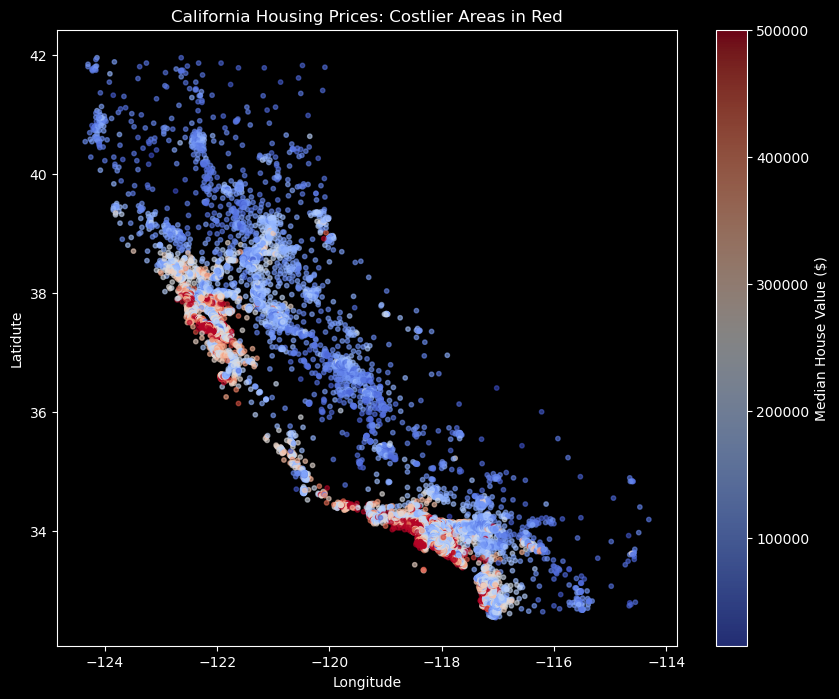

In [23]:
plt.style.use('dark_background')
# Geo view of housing prices by color 
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    ca_housing_data['longitude'], ca_housing_data['latitude'],
    c=ca_housing_data['median_house_value'], cmap='coolwarm', alpha=0.6, s=10
)
plt.colorbar(label='Median House Value ($)')

plt.xlabel('Longitude')
plt.ylabel('Latidute')
plt.title('California Housing Prices: Costlier Areas in Red')

plt.show()